# Task 4-Email Spam Detection

### 1. Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### 2. Importing dataset

In [2]:
dataset=pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
dataset.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
dataset.shape

(5572, 5)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
dataset.duplicated().sum()

403

The dataset has 403 duplicate rows. We drop the duplicate rows. 

In [10]:
dataset.drop_duplicates(inplace=True)

In [11]:
dataset.shape

(5169, 5)

In [12]:
dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

We can observe that Unnamed columns have null values, therefore we drop the columns

In [13]:
dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
dataset.shape

(5169, 2)

In [14]:
dataset.isnull().sum()

v1    0
v2    0
dtype: int64

In [15]:
dataset.rename(columns={'v1':'Spam','v2':'Text'},inplace=True)
dataset

,Spam,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
dataset['Spam'].value_counts()

ham     4516
spam     653
Name: Spam, dtype: int64

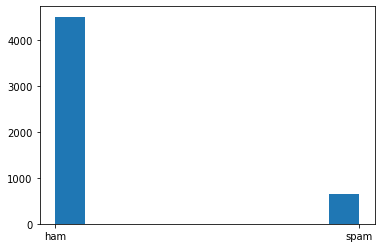

In [17]:
plt.hist(x=dataset['Spam'])
plt.show()

As we can observe, the dataset is imbalanced with maximum data being classfied as 'ham'. 
To solve this, we create two separate datasets containing 'ham' texts and 'spam' texts

In [18]:
ham_texts = dataset[dataset.Spam=='ham']
spam_texts= dataset[dataset.Spam=='spam']
print(f"Ham shape:{ham_texts.shape}") 
print(f"Spam shape: {spam_texts.shape}")

Ham shape:(4516, 2)
Spam shape: (653, 2)


Now we create a new data frame by concatenating ham_texts and spam_texts dataframes, by random sampling ham_texts

In [19]:
ham_sample = ham_texts.sample(n=653)

In [20]:
ham_sample.shape

(653, 2)

In [21]:
balanced_data = pd.concat([ham_sample,spam_texts],axis=0)
balanced_data.shape

(1306, 2)

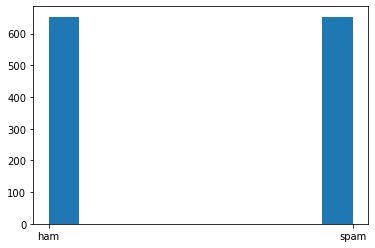

In [22]:
plt.hist(balanced_data['Spam'])
plt.show()

Now we encode the 'Ham' and 'Spam' values as 0 and 1 respectively 

In [23]:
balanced_data['Spam'].replace({'ham':0,'spam':1},inplace=True)

In [24]:
balanced_data

,Spam,Text
2143,0,You stayin out of trouble stranger!!saw Dave t...
3261,0,O shore are you takin the bus
488,0,Depends on quality. If you want the type i sen...
1202,0,"Me also da, i feel yesterday night wait til 2..."
3935,0,They r giving a second chance to rahul dengra.
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [25]:
balanced_data['Text'].nunique()

1306

### 3. Splitting data into training and testing data

In [26]:
vectorizer = TfidfVectorizer()
X=vectorizer.fit_transform(balanced_data['Text'])
Y=balanced_data['Spam']

In [27]:
print(X)

  (0, 417)	0.23619713790977037
  (0, 4297)	0.1185871621095645
  (0, 4236)	0.11270524573347185
  (0, 3917)	0.18871751842650633
  (0, 2743)	0.2143163726982054
  (0, 4108)	0.10540967929986755
  (0, 2722)	0.22339771077392087
  (0, 1956)	0.1966508292062616
  (0, 1944)	0.21549813154862268
  (0, 1982)	0.22339771077392087
  (0, 4272)	0.13934707804790847
  (0, 1062)	0.22339771077392087
  (0, 2602)	0.11239114093829734
  (0, 4316)	0.10642806669509479
  (0, 3720)	0.3104573705151508
  (0, 2855)	0.09035448764963033
  (0, 3645)	0.23619713790977037
  (0, 2104)	0.23619713790977037
  (0, 1479)	0.13587464992766088
  (0, 2938)	0.18238289210846842
  (0, 3898)	0.08123429754259621
  (0, 1478)	0.2143163726982054
  (0, 3425)	0.20151694556235586
  (0, 3738)	0.23619713790977037
  (0, 4016)	0.2143163726982054
  :	:
  (1305, 2856)	0.2933014589134966
  (1305, 163)	0.2933014589134966
  (1305, 3116)	0.25023679225024914
  (1305, 426)	0.20304208304781526
  (1305, 605)	0.20505273653098144
  (1305, 305)	0.199306005120029

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

### 4. Training the model on Logistic Regression

In [29]:
log_model = LogisticRegression()

In [30]:
log_model.fit(X_train,Y_train)

LogisticRegression()

In [31]:
train_predict = log_model.predict(X_train)
print(train_predict)

[0 1 1 ... 0 0 1]


In [32]:
train_accuracy = accuracy_score(Y_train,train_predict)
print(train_accuracy)

0.977872340425532


In [33]:
test_predict = log_model.predict(X_test)
print(test_predict)

[0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0
 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1
 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0]


In [34]:
test_accuracy=accuracy_score(Y_test,test_predict)
print(test_accuracy)

0.9465648854961832


In [35]:
from sklearn.metrics import classification_report
report = classification_report(Y_test,test_predict)
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        61
           1       1.00      0.90      0.95        70

    accuracy                           0.95       131
   macro avg       0.95      0.95      0.95       131
weighted avg       0.95      0.95      0.95       131

